In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

**Aufgabe 13:**

Approximieren Sie $\sqrt{2}$ durch $p(1/2)$, wobei $p \in \Pi_3$ das Interpolationspolynom zu

$$p(x) = 2^x, x = -1, 0, 1, 2$$

ist. Verwenden Sie dazu das Aitken-Neville Schema.

In [2]:
# x ... interpolation points
# y ... interpolation values
# v ... value

# applies aitken neville to x and y and evaluates at v
def aitken_neville(x, y, v):
    n = len(x)
    P = np.zeros((n, n))

    P[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            P[i, j] = ((v - x[i])*P[i+1, j-1] - (v - x[i+j])*P[i, j-1]) / (x[i+j] - x[i])

    #display(P)
    #display(decimal_to_fraction_matrices(P))

    return P

# f ... is approximated

# returns interpolating polynomial p of function f with interpolation points x via aitken neville
def interpolate(f, x):
    def p(v):
        n = len(x)
        y = np.array([f(x[i]) for i in range(n)])
        P = aitken_neville(x, y, v)
        return P[0, -1]

    return p

# D ... matrix with decimals (floats)
# F ... matrix with fractions

# takes matrix with decimals and returns matrix with fractions
def decimal_to_fraction_matrices(D):
    F = []

    for i in range(D.shape[0]):
        tmp = []
        for j in range(D.shape[1]):
            tmp += [D[i, j].as_integer_ratio()]

        F += [tmp]

    return np.array(F, dtype = [('numerator', 'i4'), ('denominator', 'i4')])

# concrete function from exercise
def f(x):
    if x >= 0:
        return 2**x
    else:
        return 1/2**(-x)

# concrete interpolation points from exercise
x = np.array([-1, 0, 1,  2])

p = interpolate(f, x)
display(p(1/2))

1.40625

**Aufgabe 14:**

Geben Sie die Newton-Darstellung des Interpolationspolynoms aus Aufgabe 13 an. Verwenden Sie dabei zwei unterschiedliche Varianten, nämlich die Lösung der Linearen Gleichungssystems der Vandermonde-Matrix und die rekursive Definition der dividierten Differenzen.

In [3]:
# x ... interpolation points
# y ... interpolation values

# evaluates j-th Newton Polynomial with interpolation points x at value v
def N(j, v, x):
    prod = 1

    for k in range(j):
        prod *= (v - x[k])

    return prod

# interpolates using points x and values y via linear equation system and returns newton polynomial coefficients
def interpolate_1(x, y):
    n = len(x)
    V = np.zeros((n, n))
    
    for j in range(n):
        for i in range(n):
            V[i, j] = N(j, x[i], x)
    
    #display(V)
    return np.linalg.solve(V, y)

# interpolates using points x and values y via divided differences and returns newton polynomial coefficients
def interpolate_2(x, y):
    n = len(x)
    Y = np.diag(y)
    
    for j in range(1, n):
        for i in range(n):
            if i+j >= n:
                break
            else:
                k = i+j
                Y[i, k] = (Y[i+1, k] - Y[i, k-1]) / (x[k] - x[i])

    #display(Y)
    return Y[0, :]

# concrete interpolation points from exercise
x = np.array([-1, 0, 1,  2])
n = len(x)

# use f from previous exercise to calculate interpolation values
y = np.array([f(x[i]) for i in range(n)])

display(interpolate_1(x, y))
display(interpolate_2(x, y))

array([0.5       , 0.5       , 0.25      , 0.08333333])

array([0.5       , 0.5       , 0.25      , 0.08333333])

**Aufgabe 15:**

**a)** Seien die Stutzstellen $x_0 = 1$, $x_1 = 2$, $x_2 = 3$, $x_3 = 4$ und $x_4 = 5$ gegeben. Stellen Sie die Lagrange- und die Newton-Basispolynome grafisch dar. Achten Sie dabei insbesondere auf die Werte an den Stützstellen.

**b)** Berechnen Sie näherungsweise mit dem Computer (also nicht von Hand) die Werte der Lebesgue-Konstante, indem Sie die Summe der Beträge der zugehörigen Lagrange-Polynome auf einem feinen Gitter auswerten und von den erhaltenen endlich vielen Werten das Maximum bilden.
Unterscheiden Sie dabei zwei Verteilungen von jeweils $n + 1$ Stützstellen auf dem Intervall $[−1, 1]$: Aquidistant, d.h. $x_i
:= −1 + 2i/n$ für $i = 0, \ldots, n$, bzw. die sogenannten Chebyshevknoten $x_i := \cos{(\frac{(2i−1)\pi}{2n+2})}$ für $i = 0, \ldots, n$.

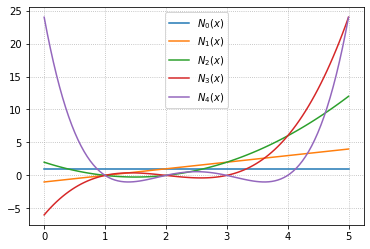

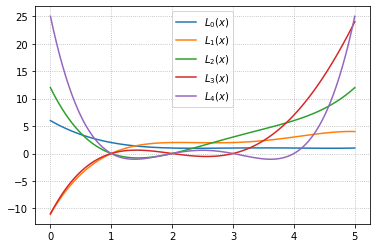

3.459295577496968

1.5487959747710554e+27

In [4]:
# x ... interpolation points

# evaluates j-th Lagrange Polynomial with interpolation points x at value v
def L(j, v, x):
    prod = 1
    n = len(x)
    
    for k in range(n):
        if k != j:
            prod *= (v - x[k])/(x[j] - x[k])

    return prod

# a     ... interval lower bound
# b     ... interval upper bound
# delta ... interval fineness

a = 0
b = 5
delta = 100

# from exercise
interpolation_points = [1, 2, 3, 4, 5]
n = len(interpolation_points)

# points and values for x- and y-axis respectively
x = np.linspace(a, b, delta)
y = np.zeros((n, delta))

# calculate values for y-axis with
# Newton Polynomials
# then plot them over x

for i in range(n):
    for d in range(delta):
        y[i][d] += N(i, x[d], interpolation_points)

    plt.plot(x, y[i])

plt.legend(('$N_0(x)$', '$N_1(x)$', '$N_2(x)$', '$N_3(x)$', '$N_4(x)$'))

plt.grid(linestyle = ':')
plt.show()

# calculate values for y-axis with
# Lagrange Polynomials
# then plot them over x

for i in range(n):
    for d in range(delta):
        y[i][d] += L(i, x[d], interpolation_points)

    plt.plot(x, y[i])

plt.legend(('$L_0(x)$', '$L_1(x)$', '$L_2(x)$', '$L_3(x)$', '$L_4(x)$'))

plt.grid(linestyle = ':')
plt.show()

#----------------------------------------------------------------#

# g ... grid points

# approximates Lebesgue Constant with points g and interpolation points x (for Lagrange Polynomials)
def lebesgue_constant(g, x):
    n = len(x)
    m = len(g)
    sums = np.zeros(m)

    for i in range(m):
        for j in range(n):
            sums[i] += abs(L(j, g[i], x))

    return np.amax(sums)

# fineness ... number of elements of grid used to search for maximum

fineness = 100

# random grid points
grid = 2*np.random.rand(fineness) - 1

# determines number of chebyshev resp. equidistant knots
n = 100

# use different interpolation points
interpolation_points_chebyshev   = np.array([m.cos((2*i + 1) * m.pi / (2*n + 2)) for i in range(n+1)])
interpolation_points_equidistant = np.linspace(-1, 1, n+1)

display(lebesgue_constant(grid, interpolation_points_chebyshev))
display(lebesgue_constant(grid, interpolation_points_equidistant))

**Aufgabe 16:**

Gesucht sei die Lösung der Hermite-Polynominterpolation mit den Stützstellen $x_0 = x_1 = 0$, $x_2 = 2$ und $x_3 = x_4 = 1$. Konstruieren Sie analog zur Lagrange-Polynominterpolation Basisfunktionen $L_0, \ldots, L_4 \in \Pi_4$ sodass $\mu_j(L_k) = \delta_{jk}$ für $j, k = 0, \ldots, 4$ gilt. Skizzieren Sie die Basisfunktionen $L_j$.

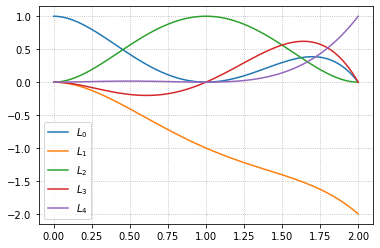

In [5]:
# evaluates k-th basis functions from exercise at value x with coefficients relating to Newton Basis Polynomials
def L(k, x, coefficients):
    n     = coefficients.shape[0]
    basis = np.array([N(j, x, interpolation_points) for j in range(n)])

    return coefficients[k] @ basis

# coefficients for Newton Basis Polynomials (calculated by hand)
coefficients = np.array([[1, 0, -1,   2, -5/4],
                         [0, 0, -1,   1, -1/2],
                         [0, 0,  1,  -2,  1  ],
                         [0, 0,  0,   1, -1  ],
                         [0, 0,  0,   0,  1/4]])

# given by exercise (for Newton Polynomials)
interpolation_points = np.array([0, 0, 1, 1, 2])

n = coefficients.shape[0]

# a     ... interval lower bound
# b     ... interval upper bound
# delta ... interval fineness

a = 0
b = 2
delta = 100

# points and values for x- and y-axis respectively
x = np.linspace(a, b, delta)
y = np.zeros((n, delta))

# calculate values for y-axis with
# basis functions from exercise
# then plot them over x

for k in range(n):
    for d in range(delta):
        y[k][d] += L(k, x[d], coefficients)

    plt.plot(x, y[k])

plt.legend(('$L_0$', '$L_1$', '$L_2$', '$L_3$', '$L_4$'))

plt.grid(linestyle = ':')
plt.show()